In [189]:
import os
import math
import random
import warnings
import numpy as np
import pandas as pd 
from sklearn import metrics
from matplotlib import pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

In [218]:
data_theorteical=pd.read_csv("C:\\Workplace\\Python\\AnalysisForThePaper\\NEH\\Final\\C# simulation data gen\\ConsoleApp2\\bin\\Debug\\0_035.csv")
data_theorteical=data_theorteical.dropna().iloc[:50,:].reset_index(drop=True)
print(data_theorteical.shape)

(50, 17)


In [219]:
data_theorteical.columns

Index(['Protein', 'Peptide', 'Charge', 'NEH', 'M0', 'M1', 'M2', 'M3', 'M4',
       'M5', 'I0', 'I1', 'I2', 'I3', 'I4', 'I5', 'pxt'],
      dtype='object')

In [246]:
data_withnoise=pd.read_csv(r"C:\Workplace\Python\AnalysisForThePaper\NEH\Final\SNR\test_perprotien\0_035_with_noise.csv")
# data_withnoise.head()

In [245]:
neh_vals=pd.read_csv(r"C:\Workplace\Python\AnalysisForThePaper\NEH\Final\SNR\test_perprotien\neh_ape_mpe_res.csv")
neh_vals.columns=[x.replace('DataRecord.','') for x in neh_vals.columns]
neh_vals.Protein=[x.replace('"',"") for x in neh_vals.Protein]
neh_vals.Peptide=[x.replace('"',"") for x in neh_vals.Peptide]
# neh_vals.head()

In [244]:
merged1=pd.merge(data_withnoise[['Protein', 'Peptide', 'Charge', 'NEH','I0', 'I1', 'I2','I3', 'I4', 'I5', 'SNR']],
neh_vals[['Protein', 'Peptide', 'Charge', 'NEH', 'NEH_sim', 'NEH_APE', 'NEH_MPE',]],
         on=['Protein', 'Peptide', 'Charge', 'NEH'])
merged1

,Protein,Peptide,Charge,NEH,I0,I1,I2,I3,I4,I5,SNR,NEH_sim,NEH_APE,NEH_MPE
0,1433B_MOUSE,NLLSVAYK,2,11,0.392722,0.361709,0.172206,0.056591,0.014248,0.003486,60,0,11.0,11.0061346082662
1,1433B_MOUSE,NLLSVAYK,2,11,0.392722,0.361709,0.172206,0.056591,0.014248,0.003486,60,0,11.0,11.1013818182868
2,1433B_MOUSE,NLLSVAYK,2,11,0.392722,0.361709,0.172206,0.056591,0.014248,0.003486,60,0,11.0,11.1226974669845
3,1433B_MOUSE,NLLSVAYK,2,11,0.392722,0.361709,0.172206,0.056591,0.014248,0.003486,60,0,11.0,10.8148611991331
4,1433B_MOUSE,NLLSVAYK,2,11,0.392722,0.361709,0.172206,0.056591,0.014248,0.003486,60,0,11.0,10.9881523117311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,2AAA_MOUSE,TSAcGLFSVcYPR,2,22,0.025471,0.097145,0.108003,0.189958,-0.323452,-0.172312,3,0,51.5,NaN
499996,2AAA_MOUSE,TSAcGLFSVcYPR,2,22,0.025471,0.097145,0.108003,0.189958,-0.323452,-0.172312,3,0,69.5,∞
499997,2AAA_MOUSE,TSAcGLFSVcYPR,2,22,0.025471,0.097145,0.108003,0.189958,-0.323452,-0.172312,3,0,12.2,NaN
499998,2AAA_MOUSE,TSAcGLFSVcYPR,2,22,0.025471,0.097145,0.108003,0.189958,-0.323452,-0.172312,3,0,75.8,∞


In [247]:
merged=pd.merge(data_theorteical,merged1,on=['Protein', 'Peptide', 'Charge', 'NEH'])
print(merged.shape)
# merged[['Peptide', 'Charge', 'NEH', 'M0_x', 'M1_x', 
#         'I0_x', 'I1_x', 'I2_x', 'I3_x', 'I4_x', 'I5_x', 'pxt_x',
#        'I0_y', 'I1_y', 'I2_y', 'I3_y', 'I4_y', 'I5_y',
#        'pxt_y', 'SNR']].tail(5)

(500000, 27)


In [225]:
merged["rss"]= (merged.I0_x - merged.I0_y)**2 + (merged.I1_x - merged.I1_y)**2+ (merged.I2_x - merged.I2_y)**2+(merged.I3_x - merged.I3_y)**2+(merged.I4_x - merged.I4_y)**2+(merged.I5_x - merged.I5_y)**2
merged=merged[['Protein', 'Peptide', 'Charge', 'NEH', 'SNR', 'rss']]
merged.head(5)

AttributeError: 'DataFrame' object has no attribute 'I0_x'

In [211]:
neh_vals=pd.read_csv(r"C:\Workplace\Python\AnalysisForThePaper\NEH\Final\SNR\test_perprotien\neh_ape_mpe_res.csv")
neh_vals.columns=[x.replace('DataRecord.','') for x in neh_vals.columns]
# neh_vals.columns

merged["NEH_APE"]=neh_vals.NEH_APE
merged["NEH_MPE"]=neh_vals.NEH_MPE
merged["RD_neh"]=[math.log(x+1E-1) for x in abs(merged.NEH-merged.NEH_APE)/merged.NEH]

In [212]:
print(merged.shape)
merged=merged.dropna()
print(merged.shape)


(7, 9)
(7, 9)


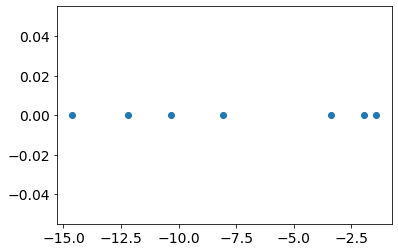

In [213]:
plt.scatter([math.log(x) for x in merged.rss],[(x) for x in abs(merged.NEH-merged.NEH_APE)/merged.NEH])

In [200]:
# [math.log(x+1E-9) for x in abs(merged.NEH-merged.NEH_APE)/merged.NEH]

In [204]:
merged.tail(50)

,Protein,Peptide,Charge,NEH,SNR,rss,NEH_APE,NEH_MPE,RD_neh
0,1433B_MOUSE,NLLSVAYK,2,11,60,4.446520e-07,11.0,11.006135,-2.302585
1,1433B_MOUSE,NLLSVAYK,2,11,50,5.035098e-06,10.9,11.353846,-2.215574
2,1433B_MOUSE,NLLSVAYK,2,11,40,3.217748e-05,10.8,12.642844,-2.135531
3,1433B_MOUSE,NLLSVAYK,2,11,30,3.097147e-04,10.1,6.679475,-1.704748
4,1433B_MOUSE,NLLSVAYK,2,11,10,3.392160e-02,11.4,1.000000,-1.992430
5,1433B_MOUSE,NLLSVAYK,2,11,5,1.439757e-01,26.4,1.000000,0.405465
6,1433B_MOUSE,NLLSVAYK,2,11,3,2.455989e-01,69.5,1.000000,1.689760


[25, 24, 21, 17, 29, 25]

1
2
3
4
5
6


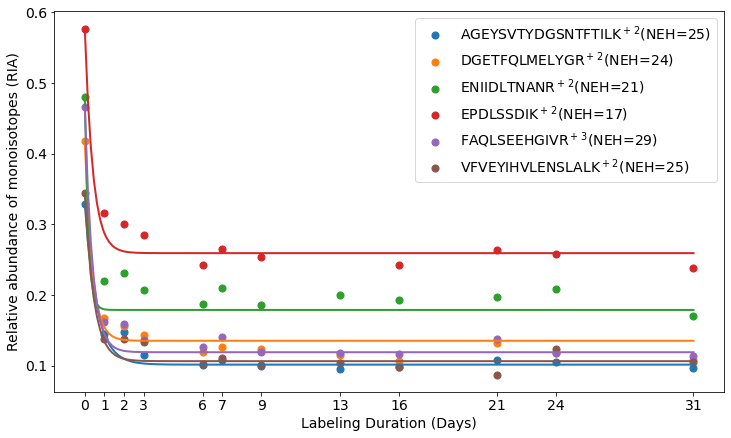

In [178]:
plt.figure(figsize=(12,7))
plt.rc('font',size=14)
colors=['#4285F4','#EA4335','#FBBC04','#34A853','#202124','m']
neh=[25,24,21,17,29,25] 
for i in range(1,7):
    print(i)
    # if i ==1: continue
    data=pd.read_csv(rf"C:\Workplace\Python\AnalysisForThePaper\NEH\Final\rate_neh_plot\mup20\{i}.csv") 
    plt.scatter(data['RIA.Time'],data['RIA.RIA_value'],s=50,label=f"{data['RIA.PeptideSeq'][0]}$^+$$^{data['RIA.Charge'][0]}$(NEH={neh[i-1]})")
    data=pd.read_csv(rf"C:\Workplace\Python\AnalysisForThePaper\NEH\Final\rate_neh_plot\mup20\{i}_t.csv") 
    plt.plot(data['TheoreticalI0Value.time'],data['TheoreticalI0Value.value'],lw=2)
    
    
data=pd.read_csv(rf"C:\Workplace\Python\AnalysisForThePaper\NEH\Final\rate_neh_plot\mup20\{i}.csv") 
plt.xticks(data['RIA.Time'])
plt.legend()
plt.xlabel('Labeling Duration (Days)')
plt.ylabel('Relative abundance of monoisotopes (RIA)')
plt.savefig("plot.jpeg",dpi=900)